# Prática 09:00 ás 12:00h

Para este experimento, vamos utilizar o dataset wine+Quality, que são dois conjuntos de dados relacionados com as variantes tinto e branco do vinho "Vinho Verde" português. Para mais detalhes, consulte: [https://www.vinhoverde.pt/en/] ou a referência [Cortez et al., 2009]. Devido a questões de privacidade e logística, apenas variáveis ​​físico-químicas (entradas) e sensoriais (saída) estão disponíveis (por exemplo, não há dados sobre os tipos de uva, marca do vinho, preço de venda do vinho, etc.).

Dataset utilizado em: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Informações do conjunto de dados:

Esses conjuntos de dados podem ser vistos como tarefas de classificação ou regressão. As classes são ordenadas e não equilibradas (por exemplo, existem muitos mais vinhos normais do que excelentes ou pobres). Algoritmos de detecção de outlier podem ser usados ​​para detectar poucos vinhos excelentes ou ruins. Além disso, não temos certeza se todas as variáveis ​​de entrada são relevantes. Portanto, pode ser interessante testar métodos de seleção de recursos.

Informação de Atributo:

Para obter mais informações, leia [Cortez et al., 2009]. Variáveis ​​de entrada (com base em testes físico-químicos):

1 - acidez fixa "fixed acidity" 
2 - acidez volátil "volatile acidity" 
3 - ácido cítrico "citric acid" 
4 - açúcar residual "residual sugar' 
5 - cloretos "chlorides" 
6 - dióxido de enxofre livre "free sulfur dioxide" 
7 - dióxido de enxofre total "total sulfur dioxide" 
8 - densidade "density" 
9 - pH "pH" 
10 - sulfatos "sulphates" 
11 - álcool Variável de saída (com base em dados sensoriais): "alcohol" 
12 - qualidade (pontuação entre 0 e 10) "quality"




ANÁLISE EXPLORATÓRIA

In [79]:
# Imports
import pandas as pd
from pandas import DataFrame
import plotly.graph_objects as go
import plotly.express as px


import missingno
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
%matplotlib inline

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [29]:
# url de leitura dos dados(DESTA FORMA ESTAMOS IMPORTANDO DATASET DIRETO DA WEB)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
dataset = pd.read_csv(url , sep = ";")
dataset.shape

(1599, 12)

In [31]:
# Mostrar as 10 primeiras colunas
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [35]:
# Mostrar as últimas linhas do dataset
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [36]:
# fazer um resumo estátistico do cunjunto de dados
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
# mostrar as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [39]:
# verificar o tipo  de dados de cada atributo
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [43]:
# verificando valores NA
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Conclusão: Não há valores nulos no conjunto de dados, portanto, vou pular a análise de valor ausente e a parte de imputação de valor ausente

Abaixo a titulo de aprendizado executamos as 3 correlações no intuito de analisar as correlações:

A correlação de Pearson avalia a relação linear entre duas variáveis contínuas.

O coeficiente de correlação de Spearman baseia-se nos valores classificados de cada variável, em vez de os dados brutos.

A correlação de Spearman é muito usada para avaliar relações envolvendo variáveis ordinais.

In [51]:
# Correlação
dataset.corr(method = 'kendall')
# Outros métodos 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.185197,0.484271,0.155029,0.176043,-0.119301,-0.056879,0.457461,-0.527832,0.141343,-0.048870,0.087966
volatile acidity,-0.185197,1.000000,-0.428354,0.022407,0.109608,0.012573,0.063701,0.015913,0.158746,-0.228888,-0.151839,-0.300779
citric acid,0.484271,-0.428354,1.000000,0.123007,0.076729,-0.049804,0.011645,0.245729,-0.389752,0.226669,0.064004,0.167318
residual sugar,0.155029,0.022407,0.123007,1.000000,0.152415,0.052682,0.102265,0.295986,-0.063127,0.026959,0.081206,0.025744
chlorides,0.176043,0.109608,0.076729,0.152415,1.000000,0.000439,0.091610,0.287866,-0.162706,0.014227,-0.197176,-0.148919
free sulfur dioxide,-0.119301,0.012573,-0.049804,0.052682,0.000439,1.000000,0.606908,-0.028972,0.079300,0.031706,-0.056019,-0.045646
total sulfur dioxide,-0.056879,0.063701,0.011645,0.102265,0.091610,0.606908,1.000000,0.087719,-0.006798,-0.000194,-0.179212,-0.156612
density,0.457461,0.015913,0.245729,0.295986,0.287866,-0.028972,0.087719,1.000000,-0.217228,0.110191,-0.329754,-0.136611
pH,-0.527832,0.158746,-0.389752,-0.063127,-0.162706,0.079300,-0.006798,-0.217228,1.000000,-0.053568,0.125311,-0.034235
sulphates,0.141343,-0.228888,0.226669,0.026959,0.014227,0.031706,-0.000194,0.110191,-0.053568,1.000000,0.143745,0.299270


SIMETRIA O termo vem do Grego syn, que é “junto”, mais metron, que quer dizer “medida” ou “a qualidade do que tem a mesma medida”.

O significado de Simetria se refere à correspondência exata de duas ou mais coisas, isto é, é aquilo que tem semelhança e proporção, seja em tamanho, forma e posição das partes de um todo.

In [54]:
# Simetria de cada atributo
dataset.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

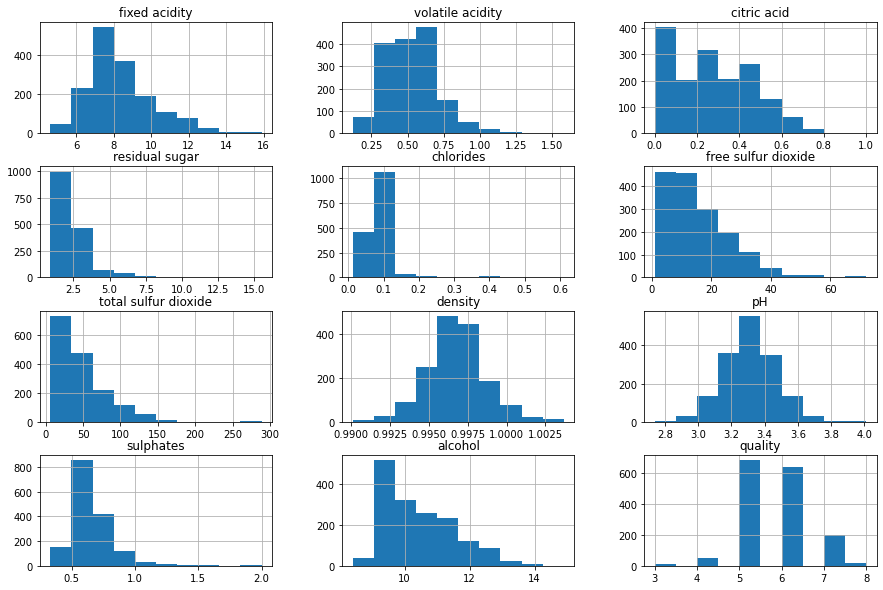

In [56]:
# Histograma (Observe free e total dioxide)

dataset.hist(figsize= (15, 10))
plt.show()

Conclusão:

ÁCIDO FIXO - Este é um total da maioria dos ácidos envolvidos com o vinho ou fixos ou não voláteis. Ele se assemelha a um gráfico de distribuição normal em forma de sino. A contagem máxima gira em torno de 7,5.

ÁCIDO VOLÁTIL - Este atributo fornece a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um sabor desagradável de vinagre. O gráfico lembra o formato de um sino, como uma distribuição normal. A maioria dos vinhos tem valores entre [0,3, 0,72].

ÁCIDO CÍTRICO - Encontrado em pequenas quantidades, o ácido cítrico pode adicionar "frescor" e sabor aos vinhos. Existem dois picos aparecendo no gráfico, um próximo a 0,02 e outro próximo a 0,25.

AÇÚCAR RESIDUAL - É a quantidade de açúcar remanescente após a parada da fermentação. O gráfico para açúcar residual é positivamente, isto é, enviesado para a esquerda. A maioria dos vinhos tem valor de açúcar residual inferior a 2,5.

CLORETOS - Os cloretos fornecem a quantidade de sal do vinho. A maioria dos vinhos tem valor de cloreto inferior a 0,2.

SO2 LIVRE - O dióxido de enxofre livre evita o crescimento microbiano e a oxidação do vinho. A maioria dos vinhos tem menos de 20 valores de SO2 livre.

TOTAL SO2 -Representa a quantidade de formas livres e ligadas de S02; em baixas concentrações, o SO2 é geralmente indetectável no vinho, mas em concentrações de SO2 livre acima de 50 mg / L, o SO2 torna-se evidente no nariz e no sabor do vinho. O gráfico parece estar inclinado para a esquerda e a maioria dos vinhos tem um valor total de SO2 inferior a 50.

DENSIDADE - O gráfico de densidade parece normalmente distribuído, com eqals médios a 0,9967 e mediana igual a 0.9968

pH - Este atributo descreve o quão ácido ou básico um vinho é em uma escala de 0 (muito ácido) a 14 (muito básico), onde 7 é neutro. O gráfico parece estar normalmente bem distribuído. A maioria dos vinhos tem um nível de pH que varia entre [3,2, 3,4].

SULFATO - É um aditivo do vinho que pode contribuir para os níveis de gás sulfuroso (S02) e atua como antimicrobiano e antioxidante. Também se assemelha a um gráfico em forma de sino com vinhos máximos tendo cerca de 6,5 valores de sulfatos.

CONTEÚDO DE ÁLCOOL - O gráfico do teor de álcool parece ser positivo, ou seja, à esquerda enviesado e a maioria deles está abaixo da marca de 11%.

QUALIDADE - Os vinhos neste conjunto de dados pertencem à faixa [3,8] e a maioria deles pertence a 5.

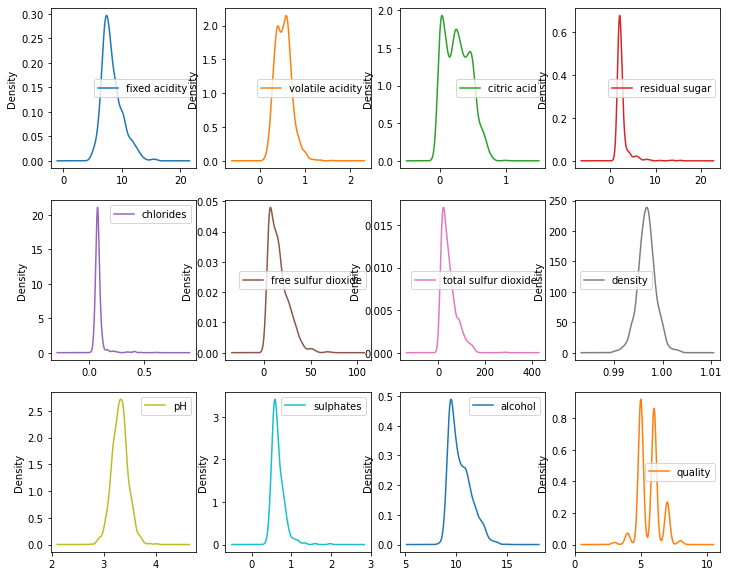

In [60]:
# Density Plot
dataset.plot(kind = 'density', 
             subplots = True, 
             layout = (3,4), # tamanho
             sharex = False, 
             figsize = (12,10))
plt.show()

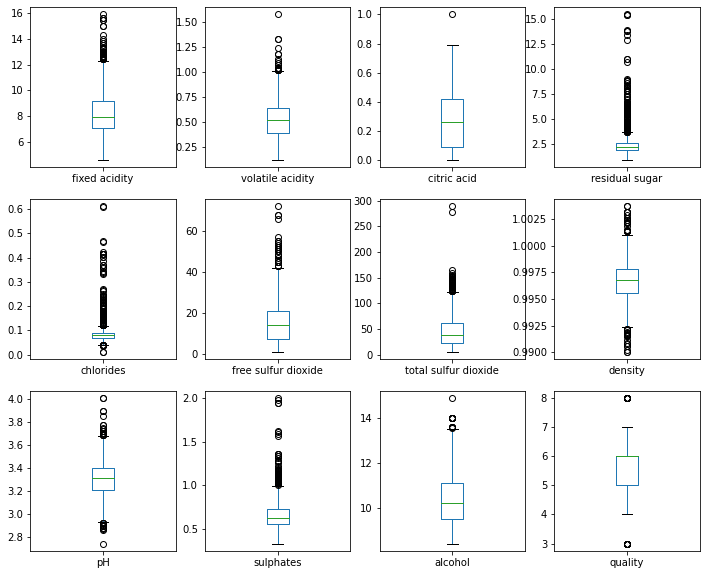

In [61]:
# Boxplot ( podemos ver diversos outliers)
dataset.plot(kind = 'box', 
             subplots = True, 
             layout = (3,4), 
             sharex = False, 
             sharey = False, 
             figsize = (12,10))
plt.show()

VERFICANDO CORRELAÇÕES EM NOSSOS ATRIBUTOS

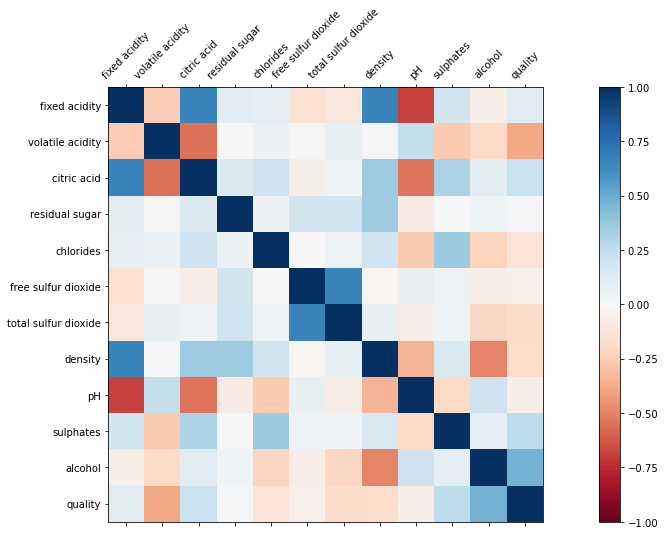

In [71]:
# Matriz de Correlação com Matplotlib

# Armazena as correlações em uma variável
correlations = dataset.corr().reset_index()

# Cria uma figura
fig = plt.figure(figsize = (20,8))

# Adiciona o gráfico
ax = fig.add_subplot(111)

# Plota as correlações
cax = ax.matshow(dataset.corr(), 
                 vmin=-1, vmax=1, 
                 interpolation='none', 
                 cmap=cm.get_cmap('RdBu'))

# Adiciona a barra de cores
fig.colorbar(cax)

# Define o tamanho do quadrado
ticks = np.arange(0, 12, 1)
colunas = dataset.columns

# Seta as labels dos eixos x e y
plt.xticks(rotation = 45)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)

# Mostra o gráfico
plt.show()

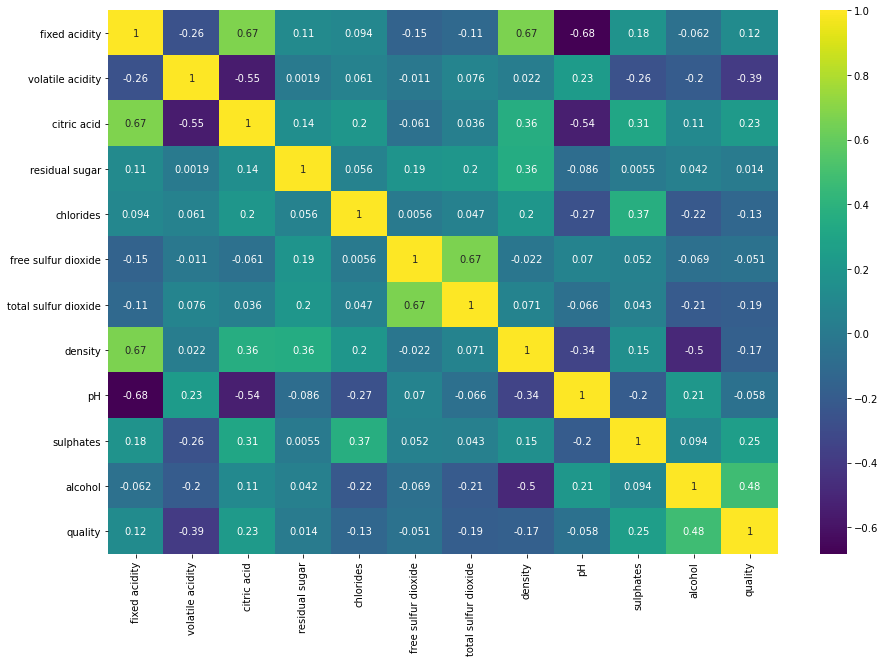

In [68]:
# vamos ver as correlações de uma outra forma
# Com o Serborn

plt.figure(figsize=(15, 10))
correlation = dataset.corr()
sns.heatmap(correlation, 
            annot=True, 
            cmap='viridis')
plt.show()

In [74]:
# Correlação em números
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Os resultados acima mostram a medida de correlação entre a qualidade e outras colunas. Pode-se deduzir que o álcool possui o maior valor de correlação. Depois temos sulfatos, ácido cítrico, acidez fixa e açúcar residual. Vamos examinar mais de perto esses fatores.

In [81]:
# Alcool Mapa de Calor de Qualidade
fig = px.density_heatmap(dataset, 
                         x="alcohol", 
                         y="quality", 
                         nbinsx=20, 
                         nbinsy=10, 
                         color_continuous_scale="thermal")
fig.show()

Conclusão - A faixa de álcool entre [9,10] e a qualidade igual a 5 é responsável pelo maior número de vinhos. À medida que avançamos na qualidade, os vinhos com maior teor alcoólico aumentam, enquanto na qualidade inferior, o teor alcoólico também diminui. A faixa ideal de álcool parece estar entre [10.5,12.5].

In [82]:
# Acido citrico
fig = px.density_heatmap(dataset, x="citric acid", y="quality", nbinsx=30, nbinsy=10,color_continuous_scale="thermal")
fig.show()

In [83]:
#Acidez fixa
fig = px.density_heatmap(dataset, x="fixed acidity", y="quality", nbinsx=30, nbinsy=10, color_continuous_scale="thermal")
fig.show()

Conclusão - Muitos vinhos se enquadram na categoria de acidez fixa na faixa entre [7,8] e a qualidade de [5,6].

In [84]:
#Categorizando a qualidade do vinho

categor_condn=[ (dataset['quality']>=7),
               (dataset['quality']<=4)]
rating=['superior','inferior']
dataset['rating'] = np.select(categor_condn,rating,default='fine')

dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,fine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,fine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,fine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,fine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,fine
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,fine
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,fine
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,superior
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,superior
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,fine


In [86]:
dataset['rating'].value_counts()

fine        1319
superior     217
inferior      63
Name: rating, dtype: int64

In [91]:
# Agrupamento a avaliação (rating)
dataset.groupby('rating').mean().reset_index()

,rating,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,fine,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
1,inferior,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
2,superior,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


In [92]:

#visualizando o agrupamento
fig = px.histogram(dataset, x="alcohol", color="rating",marginal="violin")
fig.update_traces(opacity=0.85)
fig.show()

Conclusão - O gráfico acima mostra a distribuição do teor alcoólico em relação às avaliações. Podemos verificar que os vinhos de qualidade superior apresentam maior percentual de teor alcoólico enquanto que os vinhos de qualidade inferior apresentam menor percentual de teor alcoólico.

In [94]:
#vamos fazer as confirmações visuais 

fig = px.scatter(dataset, x="free sulfur dioxide", 
                 y="total sulfur dioxide", 
                 color="rating",
                 facet_col="rating", 
                 title="Total SO2, free SO2 Vs Rating")

fig.update_xaxes(showgrid=False)

fig.show()

Conclusão - A maioria dos vinhos de qualidade superior estão abaixo da concentração de dióxido de enxofre total de 75 mg / dm3 e, abaixo da concentração de dióxido de enxofre livre de 30 mg / dm3

In [95]:
fig = px.scatter(dataset, x="volatile acidity", y="alcohol", color="rating",
                 facet_col="rating", title="Alcohol, Volatile Alcohol Vs Rating")

fig.update_xaxes(showgrid=False)

fig.show()


O que você aprendeu sobre as técnicas de análise exploratória e pré-processamento de dados?

Análise exploratória de dados é uma etapa muito importante que se realiza depois da engenharia de características [feature engineering, ou seja, o pré-processamento dos dados para técnicas de machine learning, aprendizado de máquinas] e da coleta de dados. Deve-se colocá-la em prática antes de qualquer tipo de modelagem em si. Isso acontece pois é essencial que o cientista de dados seja capaz de entender a natureza dos dados sem fazer suposições. E o seu objetivo é utilizar síntese estatística e técnicas de visualização para entender melhor os dados e identificar insights sobre tendências e a qualidade dos dados, bem como para formular hipóteses e fazer suposições nas análises. Análise exploratória de dados NÃO SE TRATA de elaborar visualizações sofisticadas ou mesmo esteticamente agradáveis.

Conforme aprendido em aulas anteriores, e embora seja uma etapa “menos glamourosa”, a maior parte do tempo gasto é ocupado nessa atividade. Estima-se que ela consuma em torno de 70-80% do tempo e esforço total de um projeto de análise de dados.

O pré-processamento é um conjunto de atividades que envolvem preparação, organização e estruturação dos dados. Trata-se de uma etapa fundamental que precede a realização de análises e predições.

Essa etapa é de grande importância, pois será determinante para a qualidade final dos dados que serão analisados. Ela pode, inclusive, impactar no modelo de previsão, gerado a partir dos dados.

O que você aprendeu sobre este dataset?

Esse conjunto de dados( Wine Quality) pode ser visto como tarefas de classificação ou regressão. As classes são ordenadas e não equilibradas (por exemplo, existem muitos mais vinhos normais do que excelentes ou pobres). Algoritmos de detecção de outlier podem ser usados ​​para detectar poucos vinhos excelentes ou ruins. Além disso, não temos certeza se todas as variáveis ​​de entrada são relevantes. Portanto, pode ser interessante testar métodos de seleção de recursos.

Pode-se destacar algumas conclusões das estatísticas descritivas sobre as variáveis encontradas no Dataset. Há, pelo menos, duas características da qualidade do vinho (dataset escolhido) que se aproximam de uma normal. Por exemplo, as variáveis de densidade e pH do vinho parecem uma normal - tanto por meio do histograma/gráfico de densidade, como por meio da medida de simetria e Curtose.

Há algumas correlações lineares entre as variáveis que merecem destaque, por exemplo, há uma correlação positiva entre a quantidade de álcool e a qualidade do vinho, ao passo que há uma relação negativa entre a quantidade de álcool e densidade do vinho.

Pelos diagramas de caixa (boxplot), podemos ver (também) a quantidade de outliers para cada variável. Pode-se verificar que há diversos "pontos fora da curva" para quase todos os atributos, levando a necessidade de um estudo focalizado em tais observações para entender a real dinâmica desses outliers.

Por fim, entende-se que podemos explorar e entender o presente dataset com as técnicas de Machine Learning para variáveis numéricas, como regressões.

In [27]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.1.2
    Uninstalling pip-21.1.2:
      Successfully uninstalled pip-21.1.2
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Windows7\anaconda3\python.exe -m pip install --upgrade pip' command.
